## Decision Tree Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
with open("spambase.names") as spam:
    text = spam.read()
labels = re.findall(r'\n(\w*_?\W?):', text)
#labels.append('Class')
Data_set = pd.read_csv("spambase.data", header=None, names=labels +['spam']) 
# spam = spamData.pop('spam')

Data_array=Data_set.values
# print(Data_array)


In [3]:
Data_set.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
print("Number of rows before preprocessing : ", len(Data_set))

Number of rows before preprocessing :  4601


getting the duplicates in the dataset

In [5]:
Data_set.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4596    False
4597    False
4598    False
4599    False
4600    False
Length: 4601, dtype: bool

removing the duplicate values

In [6]:
Data_set.drop_duplicates(inplace=True)

In [7]:
print("Number of rows after removing duplicates : ", len(Data_set))

Number of rows after removing duplicates :  4210


All null values in the dataset

In [8]:
Data_set.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Removing the target column 

In [9]:
data=Data_set.drop(labels=['spam'], axis=1)
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [10]:
print("Number of rows after preprocessing : ", len(Data_set))

Number of rows after preprocessing :  4210


Summary of dataset before performing Standard Scaler

In [11]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


Standard Scaling for the dataset

In [12]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
df=pd.DataFrame(data=scaled_data, columns= data.columns)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.347922,1.161025,0.675889,-0.046644,-0.007737,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.116407,-0.160010,-0.525294,-0.164364,0.589246,-0.317325,-0.105071,-0.049117,0.044398,-0.021310
1,0.352150,0.368433,0.404391,-0.046644,-0.269470,0.664297,0.232922,-0.092630,-0.325617,1.053337,...,-0.116407,-0.160010,-0.043936,-0.164364,0.107759,0.433676,0.005053,-0.008143,0.244841,1.191142
2,-0.147901,-0.248027,0.811639,-0.046644,1.315470,0.338207,0.182574,0.029252,1.943000,0.002406,...,-0.116407,-0.120407,-0.003822,-0.164364,-0.006090,0.450365,-0.082129,0.133876,2.169089,3.181179
3,-0.347922,-0.248027,-0.565245,-0.046644,0.443026,-0.350205,0.484661,1.272445,0.773244,0.581180,...,-0.116407,-0.160010,-0.025702,-0.164364,-0.170935,-0.317325,-0.105071,-0.055724,-0.060834,-0.161954
4,-0.347922,-0.248027,-0.565245,-0.046644,0.443026,-0.350205,0.484661,1.272445,0.773244,0.581180,...,-0.116407,-0.160010,-0.032996,-0.164364,-0.173306,-0.317325,-0.105071,-0.055724,-0.060834,-0.161954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,0.685518,-0.248027,0.637104,-0.046644,-0.473040,0.772994,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.116407,-0.160010,0.320730,-0.164364,-0.333407,-0.317325,-0.105071,-0.127986,-0.246243,-0.328464
4206,-0.347922,-0.248027,-0.565245,-0.046644,-0.473040,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.116407,-0.160010,-0.525294,-0.164364,0.085226,-0.317325,-0.105071,-0.115525,-0.241232,-0.448093
4207,0.652181,-0.248027,0.016537,-0.046644,-0.473040,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.116407,0.243945,2.093004,-0.164364,-0.333407,-0.317325,-0.105071,-0.120081,-0.231210,-0.279966
4208,2.852406,-0.248027,-0.565245,-0.046644,-0.007737,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.116407,-0.160010,-0.317435,-0.164364,-0.333407,-0.317325,-0.105071,-0.127835,-0.236221,-0.344630


Summmary of dataset after performing Standard Scaling

In [13]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,...,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03
mean,-3.480997e-15,-2.548357e-15,3.381328e-15,-2.009289e-15,-7.919384e-15,1.947347e-15,-2.535291e-15,-3.765370e-15,-4.663622e-15,2.867804e-15,...,-3.655752e-15,-3.854122e-15,-1.138071e-15,6.488607e-17,-1.913895e-15,4.962433e-15,-1.364928e-15,2.236631e-16,-7.356480e-16,-1.421138e-16
std,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,...,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00
min,-3.479216e-01,-2.480275e-01,-5.652450e-01,-4.664436e-02,-4.730399e-01,-3.502046e-01,-2.957308e-01,-2.632646e-01,-3.256168e-01,-3.783664e-01,...,-1.164071e-01,-1.600104e-01,-5.252942e-01,-1.643641e-01,-3.334068e-01,-3.173253e-01,-1.050711e-01,-1.322705e-01,-2.562653e-01,-4.691088e-01
25%,-3.479216e-01,-2.480275e-01,-5.652450e-01,-4.664436e-02,-4.730399e-01,-3.502046e-01,-2.957308e-01,-2.632646e-01,-3.256168e-01,-3.783664e-01,...,-1.164071e-01,-1.600104e-01,-5.252942e-01,-1.643641e-01,-3.334068e-01,-3.173253e-01,-1.050711e-01,-1.133376e-01,-2.261989e-01,-4.060613e-01
50%,-3.479216e-01,-2.480275e-01,-5.652450e-01,-4.664436e-02,-4.730399e-01,-3.502046e-01,-2.957308e-01,-2.632646e-01,-3.256168e-01,-3.783664e-01,...,-1.164071e-01,-1.600104e-01,-2.590883e-01,-1.643641e-01,-3.144319e-01,-3.173253e-01,-1.050711e-01,-9.313751e-02,-1.861104e-01,-3.066403e-01
75%,-3.479216e-01,-2.480275e-01,2.880349e-01,-4.664436e-02,1.231299e-01,-3.502046e-01,-2.957308e-01,-2.632646e-01,-3.256168e-01,-8.897950e-02,...,-1.164071e-01,-1.600104e-01,1.821569e-01,-1.643641e-01,5.913558e-02,-9.619715e-02,-1.050711e-01,-5.060267e-02,-4.078958e-02,-2.818053e-02
max,1.478696e+01,3.119145e+01,9.325045e+00,3.160992e+01,1.406769e+01,2.095434e+01,1.800571e+01,2.681886e+01,1.831957e+01,2.731139e+01,...,3.338604e+01,1.720613e+01,3.503689e+01,3.843832e+01,3.818318e+01,2.472857e+01,4.538756e+01,3.310208e+01,4.979423e+01,2.513787e+01


Performing PCA to the Dataset

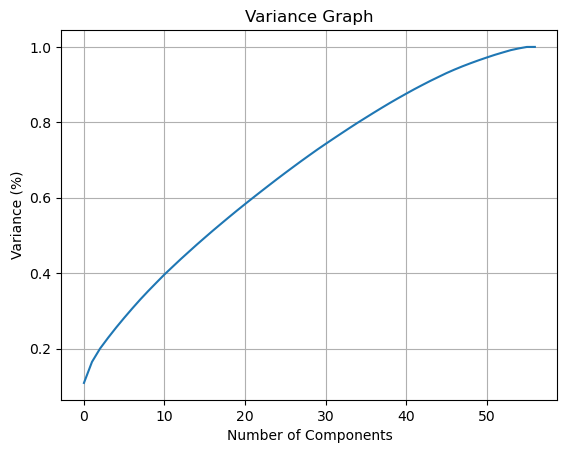

In [14]:
pca = PCA()

principalComponents = pca.fit_transform(df)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component

plt.title('Variance Graph')
plt.grid(True)
plt.show()

introducing the PCA components

In [15]:
pca = PCA(n_components=44)
new_data = pca.fit_transform(df)

# The new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data, columns = [
    'PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
    'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
    'PC21', 'PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
    'PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
    'PC41','PC42','PC43','PC44'
])

After performing PCA

In [16]:
principal_Df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44
0,-0.766904,0.049596,-0.643927,0.037415,-0.254321,-0.329410,-0.084783,0.350474,1.750867,0.181864,...,0.356762,-0.298959,0.275554,0.128186,0.254310,0.065805,0.229553,0.196205,-0.409362,0.224490
1,-1.293574,2.007046,0.071447,-0.481181,-0.099103,-1.117623,-0.545187,0.250395,-0.309176,-0.630800,...,-0.253963,-0.120345,-0.477589,-0.183846,0.129758,0.075563,0.269137,0.538458,-0.005813,0.304852
2,-1.612745,4.821323,3.137321,-1.073277,1.591848,-1.500057,-3.174192,-1.398850,1.032563,2.519781,...,2.071306,-0.021151,-0.728621,-0.285492,-0.308480,0.942212,0.890429,0.490211,0.339292,-0.736138
3,-0.857217,0.414183,-0.551303,-0.031263,-0.049748,0.703179,0.339528,-0.445635,-0.365886,0.182964,...,0.336742,-0.075157,0.058053,0.264090,-0.305521,0.474727,0.761608,-0.667253,0.368517,-0.287927
4,-0.858070,0.413516,-0.553427,-0.031523,-0.049779,0.703794,0.337783,-0.446914,-0.366229,0.182565,...,0.336067,-0.075158,0.059706,0.264558,-0.305548,0.475171,0.760942,-0.665887,0.368367,-0.286897


In [30]:
pca.explained_variance_

array([6.21425733, 3.182969  , 2.013373  , 1.62941156, 1.54594069,
       1.4686462 , 1.41593221, 1.36728111, 1.29484513, 1.24508263,
       1.23604686, 1.14931595, 1.14405142, 1.1035245 , 1.09710998,
       1.06429151, 1.05387865, 1.02433216, 1.01638907, 1.00123007,
       0.97906611, 0.96808731, 0.95331569, 0.94496088, 0.93802281,
       0.91812392, 0.90394731, 0.89565075, 0.87374838, 0.86522077,
       0.83052588, 0.81854972, 0.81022473, 0.80213397, 0.78870295,
       0.76015549, 0.7580326 , 0.74218472, 0.72644664, 0.70267079,
       0.68117447, 0.67041991, 0.63820928, 0.62577577])

In [27]:
pca.components_

array([[-0.04690805, -0.02058001, -0.05221265, ..., -0.02020217,
        -0.03395571, -0.04960885],
       [ 0.14443613,  0.11188781,  0.14576686, ...,  0.13599451,
         0.23901877,  0.20847292],
       [-0.03012271, -0.02134791, -0.03047648, ...,  0.30345833,
         0.46503706,  0.38998247],
       ...,
       [-0.15552012,  0.20063298,  0.00166932, ..., -0.08908075,
         0.04436922,  0.47643744],
       [ 0.1194235 ,  0.1392367 ,  0.06700781, ..., -0.09660241,
         0.03685786,  0.06848613],
       [ 0.13328034, -0.26160691,  0.01156303, ..., -0.16728216,
        -0.01322453,  0.37657542]])

predictive model by appling K-Nearest Neighbors (KNN) algorithm

In [19]:
X = principal_Df.iloc[:,0:44].values
y = Data_set.iloc[:, 57].values

Splitting the dataset into the Training set and Test set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Fitting classifier to the Training set

In [21]:
clf = DecisionTreeClassifier(random_state=0,criterion='gini')
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

checking Accuracy of testing dataset

In [22]:
predictions_test=clf.predict(X_test)
accuracy_score(y_test, predictions_test)

0.8788598574821853

Checking accuracy of training dataset


In [23]:
predictions_train = clf.predict(X_train)
accuracy_score(y_train,predictions_train)

0.9994061757719715

Visualizing final decision tree


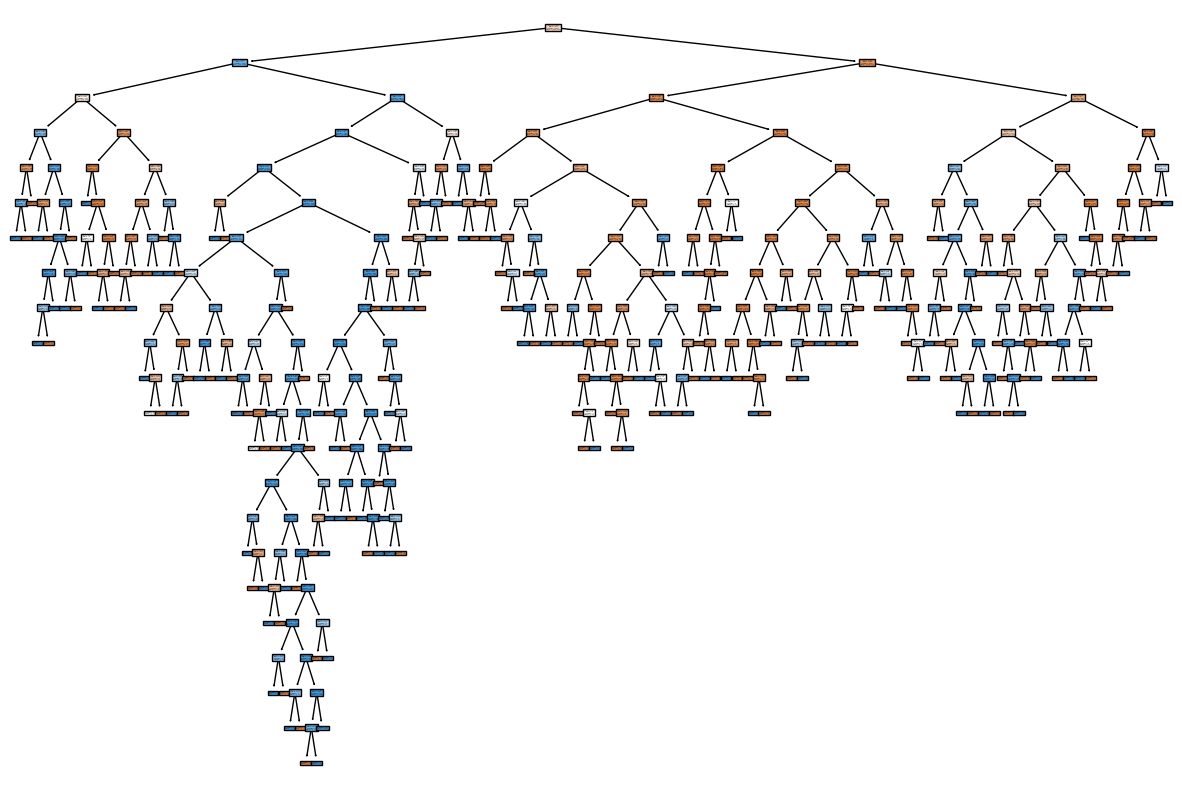

In [24]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()